In [1]:
setwd('/import/liujing/data/my')

In [2]:
load('../expr2.merged.rda')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
colnames(expr) = gsub('-','.',colnames(expr))

In [5]:
#expr2 = expr2[,c(1:18)]

In [6]:
head(expr,2)

SLC25A39 ITGA2B   H3C7     GATA1     FKBP8    CLDND2   GMPR    
CI10_M1 267.6244 1.434521 2.876601 10.183294 381.1822 17.40030 54.47858
CI11_M1 177.1709 5.114191 1.875771  4.468831 313.5352 14.64794 30.38379
        SLC4A1    R3HDM4  ST6GALNAC4 ... IFIT3    SERPING1 RNASE2   SPATA45
CI10_M1 119.40404 122.634 16.28684   ... 110.2499 7.211434 13.91627 1.04119
CI11_M1  30.82754 120.193 10.18633   ... 216.7403 6.183280 15.24340 1.07063
        IFIT1    JCHAIN   IFI44L   IGLC3      RSAD2    IGLC2   
CI10_M1 60.80880 63.33336 40.49994  0.9295386 40.57980 7.523806
CI11_M1 91.49104 61.70415 29.49408 10.7500393 45.91584 6.810389

In [7]:
Type

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [8]:
x = as.matrix(expr)
y = Type

In [9]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [10]:
options(repr.plot.width = 6)

In [11]:
set.seed(111)

In [12]:
rf = randomForest(as.factor(y)~.,data = x,ntree =2000,important=TRUE,proximity=TRUE)

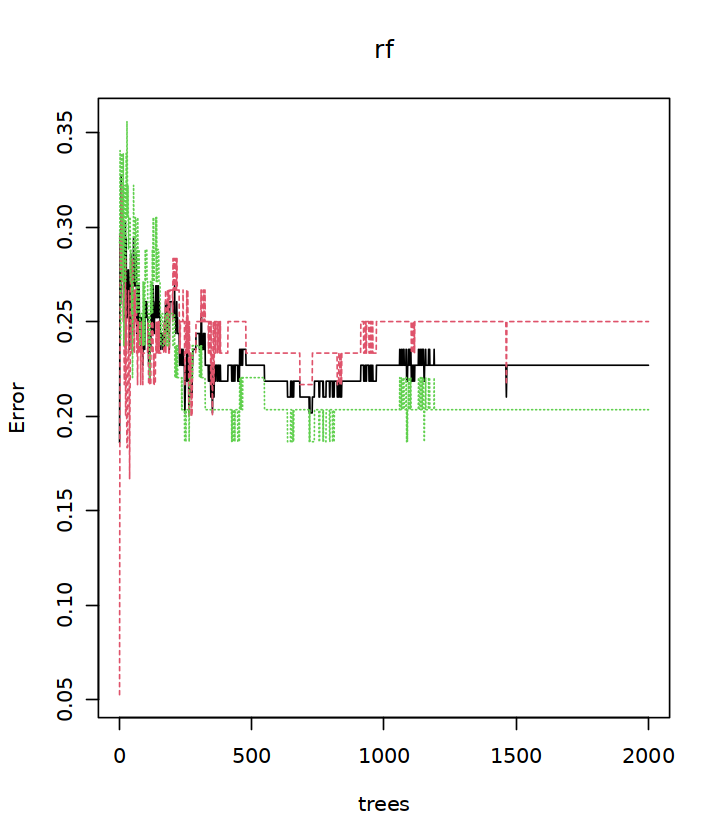

In [13]:
plot(rf)

In [14]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [15]:
trees = which.min(rf$err.rate[,1])

In [16]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [17]:
importance = importance(rf)

In [18]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [19]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [20]:
options(repr.plot.width = 4)

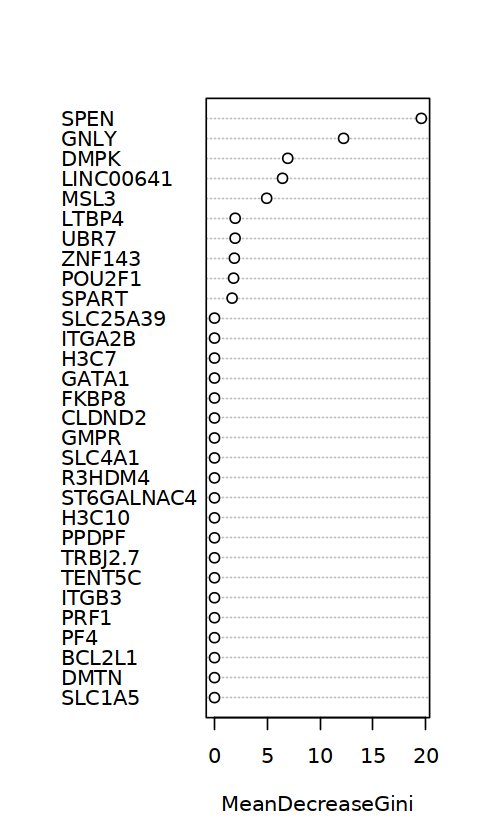

In [21]:
varImpPlot(rf,main = '')

In [22]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [23]:
rfGenes

SPEN          GNLY          DMPK     LINC00641          MSL3 
    19.587150     12.223356      6.937669      6.440660      4.941176 
        LTBP4          UBR7        ZNF143        POU2F1         SPART 
     1.959184      1.951220      1.880816      1.807059      1.666667 
     SLC25A39        ITGA2B          H3C7         GATA1         FKBP8 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       CLDND2          GMPR        SLC4A1        R3HDM4    ST6GALNAC4 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        H3C10         PPDPF       TRBJ2.7        TENT5C         ITGB3 
     0.000000      0.000000      0.000000      0.000000      0.000000 
         PRF1           PF4        BCL2L1          DMTN        SLC1A5 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       TRIM58        DCAF12          GZMM          MRC2          NRGN 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       SLC6A8        MT.ND6         RBM38      SELENBP1           BSG 
     0.000000      0.000000      0.000000      0.000000      0.000000 
         YOD1          GUK1         CDC34          RPIA          SPTB 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        SPARC      PDZK1IP1         SPON2         THBS1          FLNA 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        UBXN6          OAZ1          PIM1         EPB42          LYL1 
     0.000000      0.000000      0.000000      0.000000      0.000000 
      TMEM129          GZMH          MATK        ADGRG1       TSPOAP1 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        SMIM5         NPRL3          ZER1          SNCA      TRAPPC6A 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        DUSP2          NKG7          LFNG        MFSD2B         ACRBP 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        SSBP4          MYL4        CAPN15         CD151         TMCC2 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       MPIG6B       ADIPOR1          GPX1        SIGIRR          E2F2 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       MFSD10        CNPPD1            XK         S1PR4        LGALS3 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       CDKN1A          DGKQ          PPBP          YBX3        MAP2K3 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        ITGB5          PAXX          TMC8         TELO2        TRAJ44 
     0.000000      0.000000      0.000000      0.000000      0.000000 
      PPP2R5B          NME3           FTL          PTMS          TMC6 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       OSBPL5         PTGDS          APRT         RNF10        COL6A2 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       TRAJ24          CD81         GPAA1          CTTN          LGR6 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        S1PR5          TAL1        SLC7A5         BLVRB          SBK1 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        GUCD1         FURIN       TMEM63B          BAG6         ABCC3 
     0.000000      0.000000      0.000000      0.000000      0.000000 
         H4C3          TRDC        FGFBP2         FOXO4    ST6GALNAC6 
     0.000000      0.000000      0.000000      0.000000      0.000000 
       TEPSIN         ATG2A          LRP1         FBXO7       RNPEPL1 
     0.000000      0.000000      0.000000      0.000000      0.000000 
      SLC14A1        SNHG29         ADAM8         MBNL3         RNF11 
     0.000000      0.000000      0.000000      0.000000      0.000000 
         EML3       ABHD17A         FRMD8         STON2         TIGD5 
     0.000000      0.000000      0.000000      0.000000      0.000000 
        LLGL2         RPLP0      

In [24]:
rfGenes=names(rfGenes[rfGenes>30]) 
write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

In [25]:
sigExp=expr[rfGenes,]
write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

### svm

In [26]:
library(tidyverse)
library(glmnet)
library(VennDiagram)
library(e1071)
library(caret)
library(randomForest)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.5.1     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x randomForest::combine() mas

In [27]:
y=as.numeric(as.factor(Type))

In [28]:
library(future)
plan("multisession",workers=30)

Warning message:
"package 'future' was built under R version 4.2.3"

Attaching package: 'future'


The following object is masked from 'package:caret':

    cluster




In [29]:
set.seed(1)
rfeControl = rfeControl(functions = caretFuncs,
                        method = "cv", # 默认自助法重采样 boot
                        saveDetails = T, # 保存预测值和变量重要性
                        number = 5, # 重抽样次数
                        allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
                        )

In [30]:
Profile=rfe(x=x,y=y,sizes = c(1:10),
    rfeControl =  rfeControl,
    methods="svmRadial")

Warning message in train.default(x, y, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

In [31]:
pdf(file="SVM-RFE.pdf", width=6, height=5.5)
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
dev.off()

png 
  2

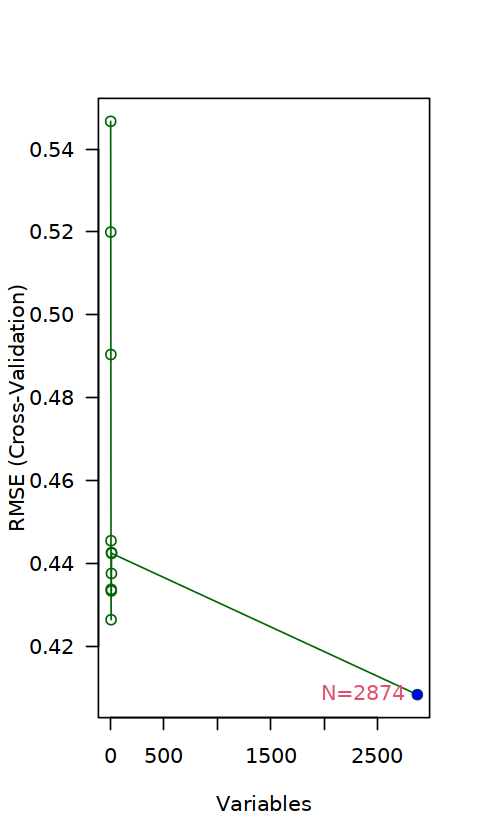

In [32]:
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

In [33]:
#输出
featureGenes = Profile$optVariables
write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

In [34]:
featureGenes

[1] "RNF215"        "RPS11"         "RBM33"         "SAP130"       
   [5] "SSU72"         "CDC42EP3"      "LCP2"          "THBS3"        
   [9] "PLEKHB2"       "RIOK3"         "TOX4"          "RPIA"         
  [13] "RAB7A"         "LRIF1"         "CBX4"          "ING1"         
  [17] "CRCP"          "ATAD3B"        "ABCB10"        "TSPOAP1"      
  [21] "MAN1B1"        "KLRK1"         "PATL1"         "TXNL1"        
  [25] "DAZAP2"        "STOML2"        "PPP1R11"       "RNF123"       
  [29] "PLEKHJ1"       "TNFSF10"       "MCRS1"         "SCNM1"        
  [33] "GOLGA5"        "MOB2"          "PABPN1"        "KHNYN"        
  [37] "TPM3"          "KLF5"          "FYB1"          "OSBPL5"       
  [41] "CCS"           "SP110"         "SLX4IP"        "LMBR1L"       
  [45] "TCP11L2"       "ZNF608"        "FLI1"          "NCOA6"        
  [49] "NBPF9"         "BAP1"          "PNRC1"         "SDHAF3"       
  [53] "RAPSN"         "KIAA0040"      "LPCAT1"        "LY6G5B"       
  [57] "CLPTM1L"       "UBE2J1"        "LIME1"         "NR2C2AP"      
  [61] "NFKBIA"        "H2BC21"        "MSL3"          "KCTD20"       
  [65] "SLC2A1"        "CCNK"          "ZMYM5"         "IL10RB"       
  [69] "PSMD13"        "TNFSF14"       "ELOB"          "CDAN1"        
  [73] "SNHG29"        "IL2RG"         "TSEN54"        "RNF14"        
  [77] "PILRB"         "RAB6B"         "MTF1"          "EXOC6"        
  [81] "EOLA1"         "SF3B5"         "CITED2"        "UVSSA"        
  [85] "MARCKS"        "CD81"          "ACADVL"        "HCAR1"        
  [89] "ARHGDIB"       "SMAD7"         "GMPR"          "EMG1"         
  [93] "ZFYVE21"       "TOGARAM2"      "STAMBP"        "RPLP1"        
  [97] "FIS1"          "CCNA2"         "YIPF2"         "PBXIP1"       
 [101] "DOCK8.AS1"     "TTC38"         "MIGA2"         "MTURN"        
 [105] "ENGASE"        "MATK"          "PPP1R10"       "PWP2"         
 [109] "TCF25"         "PRELID1"       "AAMP"          "STOM"         
 [113] "OLIG1"         "PPM1L"         "HECTD4"        "TFRC"         
 [117] "FCSK"          "TAF10"         "STK11IP"       "SMCR8"        
 [121] "QPCT"          "PRDX5"         "CAPN10"        "SLAIN2"       
 [125] "IGLC3"         "HTRA2"         "TIPIN"         "TSC2"         
 [129] "EEF1D"         "CYP2R1"        "UPK3B"         "CTSZ"         
 [133] "UNC45A"        "RETSAT"        "TRAPPC6A"      "TEDC1"        
 [137] "VHL"           "ILKAP"         "AGPAT4"        "CHRAC1"       
 [141] "NAIP"          "USP42"         "EIF1AD"        "RPL28"        
 [145] "ZCCHC2"        "UBQLN2"        "PRR3"          "ARHGEF1"      
 [149] "JHY"           "PAXX"          "MTCH1"         "LAPTM5"       
 [153] "EVA1C"         "PSMG3"         "CPEB3"         "S100A11"      
 [157] "ZMYND8"        "BAG3"          "TRMU"          "NR4A2"        
 [161] "LLGL2"         "TELO2"         "BRPF3"         "ZNF428"       
 [165] "UBASH3B"       "CLDND2"        "ARL6IP1"       "MDH2"         
 [169] "ST6GALNAC6"    "MIEF2"         "AMPD2"         "TCAF1"        
 [173] "SPTBN5"        "FOXK2"         "ZNF691"        "PLP2"         
 [177] "PLEKHG3"       "SLC25A3"       "PIK3CD.AS1"    "RNF4"         
 [181] "LYRM1"         "PSMD7"         "PHETA1"        "NAA60"        
 [185] "NOTCH2NLA"     "SRR"           "GLRX"          "ARRDC2"       
 [189] "ZNF230"        "NUBP1"         "STK11"         "SLC12A9"      
 [193] "PAF1"          "SYTL3"         "CMTM1"         "MRPL57"       
 [197] "ANP32A"        "MCM3AP"        "YWHAG"         "RAD23B"       
 [201] "ARID1B"        "EIF6"          "ABCD4"         "SEC13"        
 [205] "BET1L"         "GPR68"         "RABEP2"        "DALRD3"       
 [209] "GSTO1"         "GANAB"         "IRF2"          "RNF111"       
 [213] "ARFGAP2"       "F2R"           "SPACA6"        "OSBPL7"       
 [217] "GSE1"          "GADD45B"       "BCL2L12"       "HSPA1L"       
 [221] "CTTN"          "SEC24D"        "TIMM44"        "HERPUD2"      
 [225] "E4F1"          "MTM

### Boruta

In [35]:
library(Boruta)

In [36]:
x = as.matrix(expr)
y = Type

In [37]:
set.seed(1)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [38]:
boruta

Boruta performed 299 iterations in 22.08916 secs.
 58 attributes confirmed important: ARHGEF1, ATAD3B, BAP1, CBX4, CCS
and 53 more;
 2778 attributes confirmed unimportant: AAMP, AARS2, ABCA2, ABCA3,
ABCA7 and 2773 more;
 38 tentative attributes left: AGPAT4, ARFGAP2, CCNK, CDK10, COX7A2L
and 33 more;

In [39]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
       38        58      2778 

In [40]:
boruta$finalDecision

SLC25A39        ITGA2B          H3C7         GATA1         FKBP8 
     Rejected      Rejected      Rejected      Rejected      Rejected 
       CLDND2          GMPR        SLC4A1        R3HDM4    ST6GALNAC4 
     Rejected      Rejected      Rejected      Rejected      Rejected 
        H3C10         PPDPF       TRBJ2.7        TENT5C         ITGB3 
     Rejected      Rejected      Rejected      Rejected      Rejected 
         PRF1           PF4        BCL2L1          DMTN        SLC1A5 
     Rejected      Rejected      Rejected      Rejected      Rejected 
       TRIM58        DCAF12          GZMM          MRC2          NRGN 
     Rejected      Rejected      Rejected      Rejected      Rejected 
       SLC6A8        MT.ND6         RBM38      SELENBP1           BSG 
     Rejected      Rejected      Rejected      Rejected      Rejected 
         YOD1          GUK1         CDC34          RPIA          SPTB 
     Rejected      Rejected      Rejected     Tentative      Rejected 
        SPARC      PDZK1IP1         SPON2         THBS1          FLNA 
     Rejected      Rejected      Rejected      Rejected      Rejected 
        UBXN6          GNLY          OAZ1          PIM1         EPB42 
     Rejected      Rejected      Rejected      Rejected      Rejected 
         LYL1       TMEM129          GZMH          MATK        ADGRG1 
     Rejected      Rejected      Rejected      Rejected      Rejected 
      TSPOAP1         SMIM5         NPRL3          ZER1          SNCA 
     Rejected      Rejected      Rejected      Rejected      Rejected 
     TRAPPC6A         DUSP2          NKG7          LFNG        MFSD2B 
     Rejected      Rejected      Rejected      Rejected      Rejected 
        ACRBP         SSBP4          MYL4        CAPN15         CD151 
     Rejected      Rejected      Rejected      Rejected      Rejected 
        TMCC2        MPIG6B       ADIPOR1          GPX1        SIGIRR 
     Rejected      Rejected      Rejected      Rejected      Rejected 
         E2F2        MFSD10        CNPPD1            XK         S1PR4 
     Rejected      Rejected      Rejected      Rejected      Rejected 
       LGALS3        CDKN1A          DGKQ          PPBP          YBX3 
     Rejected      Rejected      Rejected      Rejected      Rejected 
       MAP2K3         ITGB5          PAXX          TMC8         TELO2 
     Rejected     Tentative      Rejected      Rejected      Rejected 
       TRAJ44       PPP2R5B          NME3           FTL          PTMS 
     Rejected      Rejected      Rejected      Rejected      Rejected 
         TMC6        OSBPL5         PTGDS          APRT         RNF10 
     Rejected      Rejected      Rejected      Rejected      Rejected 
       COL6A2        TRAJ24          CD81         GPAA1          CTTN 
     Rejected      Rejected      Rejected      Rejected      Rejected 
         LGR6         S1PR5          TAL1        SLC7A5         BLVRB 
     Rejected      Rejected      Rejected      Rejected      Rejected 
         SBK1         GUCD1         FURIN       TMEM63B          BAG6 
     Rejected      Rejected      Rejected      Rejected      Rejected 
        ABCC3          H4C3          TRDC        FGFBP2         FOXO4 
     Rejected      Rejected      Rejected      Rejected      Rejected 
   ST6GALNAC6        TEPSIN         ATG2A          LRP1         FBXO7 
     Rejected      Rejected      Rejected      Rejected      Rejected 
      RNPEPL1       SLC14A1        SNHG29         ADAM8         MBNL3 
     Rejected      Rejected      Rejected      Rejected      Rejected 
        RNF11          EML3       ABHD17A         FRMD8         STON2 
     Rejected      Rejected      Rejected      Rejected      Rejected 
        TIGD5         LLGL2         RPLP0         TTC38         FCRL6 
     Rejected      Rejected      Rejected      Rejected      Rejected 
      MARCHF8        SNHG32        FERMT3        TSEN54        MGAT4B 
     Rejected      Rejected      Rejected     Tentative     Confirmed 
     NUDT16L1        CTDSP1  

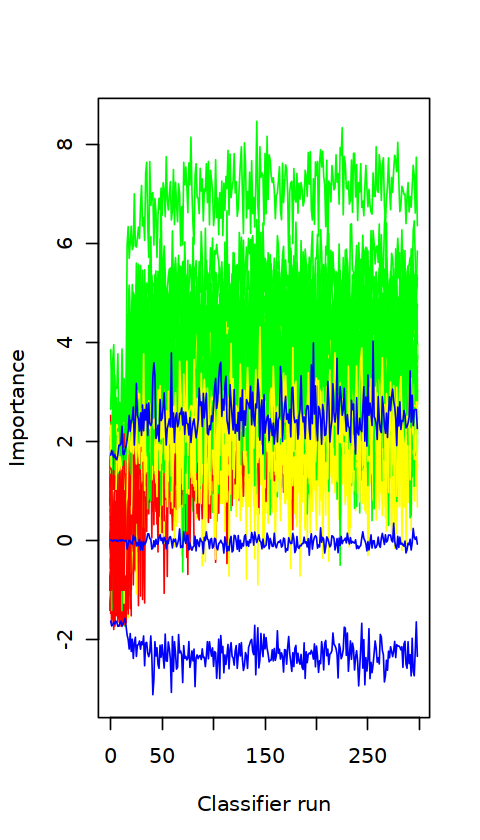

In [41]:
Boruta::plotImpHistory(boruta)

In [42]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




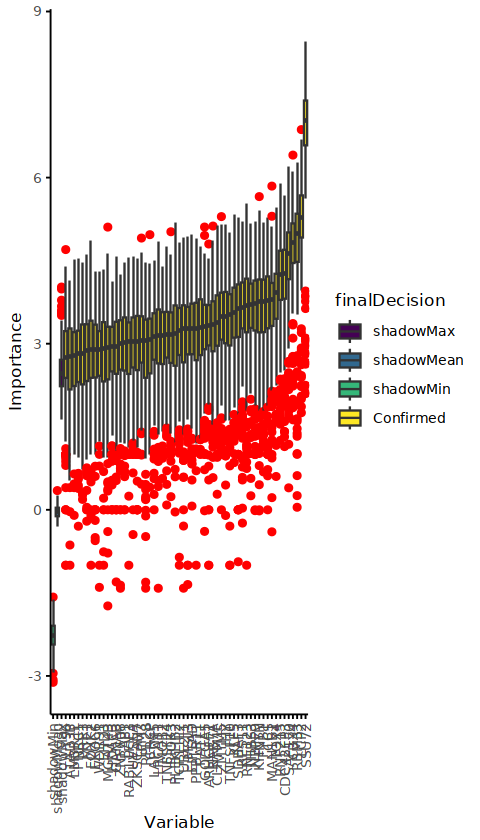

In [43]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [44]:
Group = data.frame(Group =   c(rep('CI',43),rep('H',42),rep('CI',16),rep('H',18)))

In [45]:
expr3 = cbind(Group,expr)

In [46]:
set.seed(157)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [47]:
table(test$Group)


CI  H 
19 20 

In [48]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [49]:
train_label <- as.numeric(train$Group == 'CI')
test_label <-  as.numeric(test$Group == 'CI')
all_label <-  as.numeric(expr3$Group == 'CI')

In [50]:
all_label

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

In [51]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [52]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.389576 
[2]	train-logloss:0.253757 
[3]	train-logloss:0.172295 
[4]	train-logloss:0.126872 
[5]	train-logloss:0.096374 
[6]	train-logloss:0.075169 
[7]	train-logloss:0.061877 
[8]	train-logloss:0.051592 
[9]	train-logloss:0.044046 
[10]	train-logloss:0.038759 
[11]	train-logloss:0.033983 
[12]	train-logloss:0.030472 
[13]	train-logloss:0.028841 
[14]	train-logloss:0.026093 
[15]	train-logloss:0.024851 
[16]	train-logloss:0.023555 
[17]	train-logloss:0.022456 
[18]	train-logloss:0.021522 
[19]	train-logloss:0.020637 
[20]	train-logloss:0.019814 
[21]	train-logloss:0.019063 
[22]	train-logloss:0.018368 
[23]	train-logloss:0.017794 
[24]	train-logloss:0.017273 
[25]	train-logloss:0.017273 


In [53]:
xgb

##### xgb.Booster
raw: 25 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 2874 
niter: 25
nfeatures : 2874 
evaluation_log:
    iter train_logloss
       1    0.38957638
       2    0.25375657
---                   
      24    0.01727336
      25    0.01727289

Feature Gain       Cover      Frequency 
1 LCP2    0.17796442 0.07345272 0.01639344
2 THBS3   0.11187719 0.05997426 0.03278689
3 RBM33   0.11037794 0.06452962 0.03278689
4 RNF215  0.07602787 0.06766322 0.03278689
5 KCTD20  0.06793067 0.03895361 0.03278689
6 SSU72   0.06155649 0.08949628 0.06557377

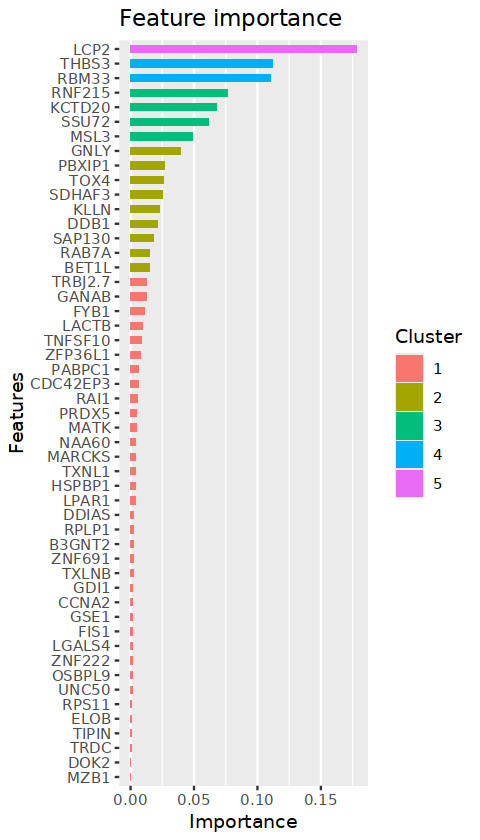

In [54]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

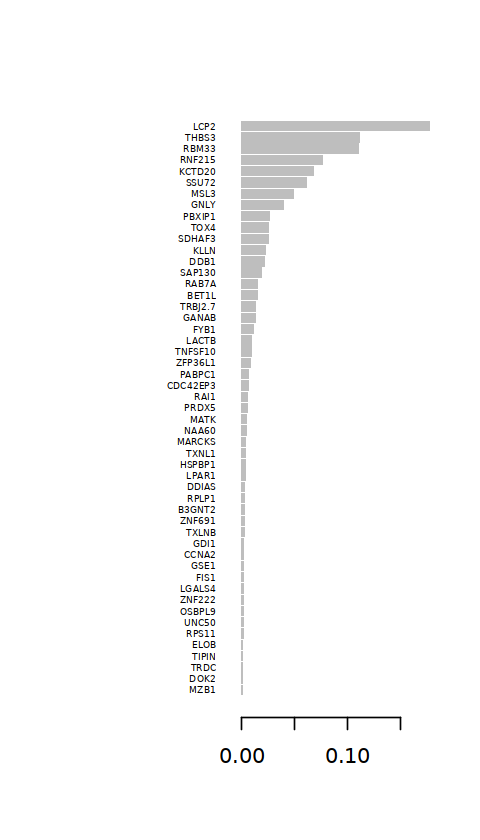

In [55]:
xgb.plot.importance(importance)

### 韦恩图

In [56]:
SVF.RFE.gene = featureGenes

In [57]:
RF.gene = colnames(sigExp)

XGBoost.gene = importance$Feature

In [58]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed')) %>% dplyr::select(Variable) %>% unique()

In [59]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [60]:
list1 = list(Boruta.gene,XGBoost.gene) #SVF.RFE.gene, RF.gene,

In [61]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 2)"


In [62]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(Boruta.gene = data[,1], XGBoost.gene = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"


png 
  2

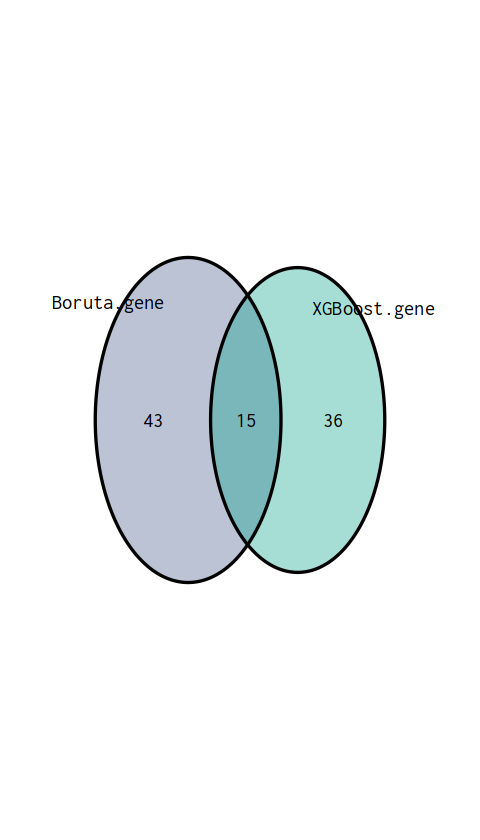

In [63]:
grid.draw(q)

In [64]:
model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),SVF.RFE.gene)

In [65]:
model.gene = Boruta.gene

In [66]:
model.gene

[1] "ARHGEF1"   "ATAD3B"    "BAP1"      "CBX4"      "CCS"       "CDC42EP3" 
 [7] "CLPTM1L"   "CRCP"      "EHD3"      "EIF1AD"    "EXOC6"     "FOXK2"    
[13] "FYB1"      "GANAB"     "GOLGA5"    "HDAC3"     "JHY"       "KHNYN"    
[19] "KLF5"      "LAPTM5"    "LCP2"      "LMBR1L"    "LPCAT1"    "LY96"     
[25] "MAN1B1"    "MGAT4B"    "MOB2"      "MSL3"      "MTF1"      "NBPF9"    
[31] "PATL1"     "PLEKHB2"   "PNRC1"     "PPP1R11"   "PRR3"      "RAB11FIP3"
[37] "RAB7A"     "RBM33"     "RIOK3"     "RNF123"    "RNF215"    "RPL28"    
[43] "RPS11"     "SAP130"    "SDHAF3"    "SSU72"     "TCP11L2"   "THBS3"    
[49] "TNFSF10"   "TNFSF14"   "TOX4"      "TPM3"      "UBE2J1"    "UVSSA"    
[55] "WDR91"     "ZKSCAN7"   "ZMYM5"     "ZNF608"

In [67]:
set.seed(1234)

In [68]:
expr3 = cbind(Group,expr)

In [69]:
expr3[expr3$Group =='CI',]$Group<-1

In [70]:

expr3[expr3$Group =='H',]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [71]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [72]:
dim(expr4)

[1] 119  59

In [73]:
head(expr4,4)

Group ARHGEF1  ATAD3B   BAP1      CBX4     CCS      CDC42EP3 CLPTM1L 
CI10_M1 1     33.31958 1.676696  9.788667 11.74388 9.068322 18.98637 7.500601
CI11_M1 1     47.07754 1.571568 13.384594 16.37456 8.927370 26.79820 7.271525
CI12_M1 1     72.96659 2.120503 11.139291 21.45059 8.514323 27.92396 8.948076
CI13_M1 1     53.43716 1.468541  9.891013 21.64891 9.763506 32.63165 5.475760
        CRCP     EHD3     ... TNFSF10   TNFSF14  TOX4     TPM3     UBE2J1  
CI10_M1 7.319935 1.936368 ... 130.43845 12.18989 17.06808 42.09047 48.31533
CI11_M1 8.259402 4.562458 ... 110.33508 25.95693 21.58274 63.14286 56.36377
CI12_M1 7.779718 3.372141 ...  71.32659 31.07127 22.13748 62.96879 47.32377
CI13_M1 7.227608 2.847716 ... 104.90373 36.02389 19.37434 53.72118 40.65336
        UVSSA    WDR91    ZKSCAN7  ZMYM5     ZNF608   
CI10_M1 4.659561 4.610088 2.208400 11.984124 0.9271098
CI11_M1 5.927760 4.798672 1.623139  9.526282 0.7268928
CI12_M1 7.888232 5.398897 1.433618  9.015404 0.7824629
CI13_M1 8.039966 4.441329 1.862002  7.586178 1.2303646

In [74]:
library(caret)
library(ggplot2)

### 这里使用48个基因先看看情况



In [75]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "CBX4 0.640677966101695"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CDC42EP3 0.780790960451977"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "EIF1AD 0.628813559322034"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "EXOC6 0.72090395480226"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "FOXK2 0.581073446327684"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "FYB1 0.789830508474576"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "GOLGA5 0.721751412429379"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "JHY 0.620621468926554"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "KLF5 0.792372881355932"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "LAPTM5 0.711581920903955"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "LCP2 0.807344632768362"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "LY96 0.716666666666667"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "MSL3 0.706214689265537"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "MTF1 0.772316384180791"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PATL1 0.802824858757062"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PNRC1 0.643220338983051"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PPP1R11 0.774011299435028"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PRR3 0.712429378531073"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RAB7A 0.792372881355932"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RBM33 0.751694915254237"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RPL28 0.662429378531073"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RPS11 0.763841807909605"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SAP130 0.784745762711864"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SDHAF3 0.60819209039548"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SSU72 0.768079096045198"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TNFSF10 0.775706214689265"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TNFSF14 0.718079096045198"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TOX4 0.780225988700565"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TPM3 0.793502824858757"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "UBE2J1 0.786158192090396"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ZKSCAN7 0.589830508474576"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ZMYM5 0.725706214689266"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ZNF608 0.69180790960452"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 120 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [115]:
a

[1] "SPATA45" "JCHAIN"  "IGLC3"   "IGHG2"   "IGHA1"

In [76]:
expr4 = expr4[,c('Group',a)]

In [77]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following object is masked from 'package:purrr':

    compact


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following object is masked from 'package:e1071':

    impute


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    for

In [78]:
varsU<-names(expr4[,2:dim(expr4)[2]])

In [79]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

W

In [80]:
Result

Estimate   Std..Error  z.value  Pr...z..     OR        X2.5..   
CBX4     0.16548128 0.056459818 2.930957 3.379198e-03  1.179961 1.0626832
CDC42EP3 0.25906600 0.059689039 4.340261 1.423137e-05  1.295719 1.1624790
EIF1AD   0.34629968 0.127332229 2.719655 6.535014e-03  1.413826 1.1124419
EXOC6    0.31534352 0.080361707 3.924052 8.707189e-05  1.370730 1.1853144
FOXK2    0.23455355 0.149617990 1.567683 1.169552e-01  1.264344 0.9475838
FYB1     0.04444381 0.009279167 4.789633 1.670865e-06  1.045446 1.0280197
GOLGA5   0.43236421 0.105794226 4.086841 4.372861e-05  1.540896 1.2713225
JHY      1.31311544 0.434276435 3.023686 2.497157e-03  3.717738 1.6726201
KLF5     2.53434117 0.529830316 4.783307 1.724343e-06 12.608121 4.8144473
LAPTM5   0.01479215 0.004209735 3.513797 4.417507e-04  1.014902 1.0070219
LCP2     0.10891492 0.021936416 4.965028 6.869123e-07  1.115067 1.0717293
LY96     0.08288025 0.021177891 3.913527 9.095764e-05  1.086412 1.0455771
MSL3     0.24481405 0.067016378 3.653048 2.591456e-04  1.277384 1.1302926
MTF1     0.69351935 0.158637792 4.371716 1.232739e-05  2.000744 1.4981515
PATL1    0.26509958 0.057655258 4.598012 4.265409e-06  1.303561 1.1742671
PNRC1    0.02548815 0.008545308 2.982707 2.857114e-03  1.025816 1.0096743
PPP1R11  0.15314612 0.035013460 4.373921 1.220344e-05  1.165495 1.0933528
PRR3     0.89146654 0.228629563 3.899174 9.652123e-05  2.438703 1.5944403
RAB7A    0.07496947 0.016576158 4.522729 6.104735e-06  1.077851 1.0461188
RBM33    0.40821474 0.096637896 4.224168 2.398247e-05  1.504130 1.2600920
RPL28    0.01941937 0.006075814 3.196176 1.392621e-03  1.019609 1.0082455
RPS11    0.01401780 0.003211883 4.364357 1.274970e-05  1.014117 1.0081852
SAP130   0.57838117 0.123076101 4.699378 2.609545e-06  1.783149 1.4255707
SDHAF3   0.86966523 0.361131167 2.408170 1.603271e-02  2.386112 1.2038117
SSU72    0.95539824 0.214547545 4.453084 8.464562e-06  2.599706 1.7613398
TNFSF10  0.04180908 0.010305528 4.056957 4.971627e-05  1.042695 1.0234829
TNFSF14  0.17346601 0.042537559 4.077949 4.543467e-05  1.189420 1.1006882
TOX4     0.38466814 0.085467166 4.500771 6.770742e-06  1.469127 1.2567377
TPM3     0.11649097 0.025726241 4.528099 5.951662e-06  1.123547 1.0722229
UBE2J1   0.11869120 0.024822953 4.781510 1.739832e-06  1.126022 1.0760836
ZKSCAN7  1.00663072 0.490500974 2.052250 4.014535e-02  2.736366 1.0681101
ZMYM5    0.50185794 0.123634414 4.059209 4.923920e-05  1.651787 1.3185628
ZNF608   2.48866544 0.680969201 3.654593 2.575900e-04 12.045190 3.4872343
         X97.5..   Characteristics
CBX4      1.327620 CBX4           
CDC42EP3  1.470754 CDC42EP3       
EIF1AD    1.838647 EIF1AD         
EXOC6     1.625973 EXOC6          
FOXK2     1.710435 FOXK2          
FYB1      1.066348 FYB1           
GOLGA5    1.928547 GOLGA5         
JHY       9.249929 JHY            
KLF5     38.883802 KLF5           
LAPTM5    1.023899 LAPTM5         
LCP2      1.168733 LCP2           
LY96      1.136495 LY96           
MSL3      1.471258 MSL3           
MTF1      2.798607 MTF1           
PATL1     1.473932 PATL1          
PNRC1     1.044325 PNRC1          
PPP1R11   1.255036 PPP1R11        
PRR3      3.930469 PRR3           
RAB7A     1.116642 RAB7A          
RBM33     1.844555 RBM33          
RPL28     1.032683 RPL28          
RPS11     1.021045 RPS11          
SAP130    2.314630 SAP130         
SDHAF3    5.004793 SDHAF3         
SSU72     4.109771 SSU72          
TNFSF10   1.065888 TNFSF10        
TNFSF14   1.301735 TNFSF14        
TOX4      1.761162 TOX4           
TPM3      1.186570 TPM3           
UBE2J1    1.186668 UBE2J1         
ZKSCAN7   7.396022 ZKSCAN7        
ZMYM5     2.144707 ZMYM5          
ZNF608   50.778810 ZNF608

In [81]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

In [82]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [83]:
Uni_log[tzgene,]

Estimate   P            OR        CIlower  CIupper   Characteristics
CBX4     0.16548128 3.379198e-03  1.179961 1.062683  1.327620 CBX4           
CDC42EP3 0.25906600 1.423137e-05  1.295719 1.162479  1.470754 CDC42EP3       
EIF1AD   0.34629968 6.535014e-03  1.413826 1.112442  1.838647 EIF1AD         
EXOC6    0.31534352 8.707189e-05  1.370730 1.185314  1.625973 EXOC6          
FYB1     0.04444381 1.670865e-06  1.045446 1.028020  1.066348 FYB1           
GOLGA5   0.43236421 4.372861e-05  1.540896 1.271323  1.928547 GOLGA5         
JHY      1.31311544 2.497157e-03  3.717738 1.672620  9.249929 JHY            
KLF5     2.53434117 1.724343e-06 12.608121 4.814447 38.883802 KLF5           
LAPTM5   0.01479215 4.417507e-04  1.014902 1.007022  1.023899 LAPTM5         
LCP2     0.10891492 6.869123e-07  1.115067 1.071729  1.168733 LCP2           
LY96     0.08288025 9.095764e-05  1.086412 1.045577  1.136495 LY96           
MSL3     0.24481405 2.591456e-04  1.277384 1.130293  1.471258 MSL3           
MTF1     0.69351935 1.232739e-05  2.000744 1.498152  2.798607 MTF1           
PATL1    0.26509958 4.265409e-06  1.303561 1.174267  1.473932 PATL1          
PNRC1    0.02548815 2.857114e-03  1.025816 1.009674  1.044325 PNRC1          
PPP1R11  0.15314612 1.220344e-05  1.165495 1.093353  1.255036 PPP1R11        
PRR3     0.89146654 9.652123e-05  2.438703 1.594440  3.930469 PRR3           
RAB7A    0.07496947 6.104735e-06  1.077851 1.046119  1.116642 RAB7A          
RBM33    0.40821474 2.398247e-05  1.504130 1.260092  1.844555 RBM33          
RPL28    0.01941937 1.392621e-03  1.019609 1.008246  1.032683 RPL28          
RPS11    0.01401780 1.274970e-05  1.014117 1.008185  1.021045 RPS11          
SAP130   0.57838117 2.609545e-06  1.783149 1.425571  2.314630 SAP130         
SDHAF3   0.86966523 1.603271e-02  2.386112 1.203812  5.004793 SDHAF3         
SSU72    0.95539824 8.464562e-06  2.599706 1.761340  4.109771 SSU72          
TNFSF10  0.04180908 4.971627e-05  1.042695 1.023483  1.065888 TNFSF10        
TNFSF14  0.17346601 4.543467e-05  1.189420 1.100688  1.301735 TNFSF14        
TOX4     0.38466814 6.770742e-06  1.469127 1.256738  1.761162 TOX4           
TPM3     0.11649097 5.951662e-06  1.123547 1.072223  1.186570 TPM3           
UBE2J1   0.11869120 1.739832e-06  1.126022 1.076084  1.186668 UBE2J1         
ZKSCAN7  1.00663072 4.014535e-02  2.736366 1.068110  7.396022 ZKSCAN7        
ZMYM5    0.50185794 4.923920e-05  1.651787 1.318563  2.144707 ZMYM5          
ZNF608   2.48866544 2.575900e-04 12.045190 3.487234 50.778810 ZNF608

### 多因素分析

In [84]:
tzgene

[1] "CBX4"     "CDC42EP3" "EIF1AD"   "EXOC6"    "FYB1"     "GOLGA5"  
 [7] "JHY"      "KLF5"     "LAPTM5"   "LCP2"     "LY96"     "MSL3"    
[13] "MTF1"     "PATL1"    "PNRC1"    "PPP1R11"  "PRR3"     "RAB7A"   
[19] "RBM33"    "RPL28"    "RPS11"    "SAP130"   "SDHAF3"   "SSU72"   
[25] "TNFSF10"  "TNFSF14"  "TOX4"     "TPM3"     "UBE2J1"   "ZKSCAN7" 
[31] "ZMYM5"    "ZNF608"

In [85]:
#tzgene1 = tzgene[-5]

In [86]:
data = expr4[,c('Group',tzgene)]
data$Group = factor(data$Group,levels = c(1,0))

In [87]:
fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-7.617e-05  -2.100e-08   2.100e-08   2.100e-08   6.748e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.223e+03  5.180e+05   0.004    0.997
CBX4         6.645e+00  1.004e+04   0.001    0.999
CDC42EP3    -1.057e+01  6.503e+03  -0.002    0.999
EIF1AD       1.893e+02  3.461e+04   0.005    0.996
EXOC6        2.904e+01  2.823e+04   0.001    0.999
FYB1         1.730e+00  9.092e+02   0.002    0.998
GOLGA5       6.487e+01  1.868e+04   0.003    0.997
JHY         -8.393e+01  5.797e+04  -0.001    0.999
KLF5         3.676e+01  5.203e+04   0.001    0.999
LAPTM5       7.242e-01  1.278e+03   0.001    1.000
LCP2         9.209e-01  1.868e+03   0.000    1.000
LY96        -1.798e+01  4.801e+03  -0.004    0.997
MSL3        -3.850e+00  1.144e+04   0.000    1.000
MTF1         1.999e+01  3.488e+04   0.001    1.000
PATL1     

In [88]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=66
Group ~ CBX4 + CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + 
    KLF5 + LAPTM5 + LCP2 + LY96 + MSL3 + MTF1 + PATL1 + PNRC1 + 
    PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + RPS11 + SAP130 + 
    SDHAF3 + SSU72 + TNFSF10 + TNFSF14 + TOX4 + TPM3 + UBE2J1 + 
    ZKSCAN7 + ZMYM5 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

           Df Deviance     AIC
- TNFSF14   1    0.000  64.000
- MSL3      1    0.000  64.000
- LAPTM5    1    0.000  64.000
- EXOC6     1    0.000  64.000
- MTF1      1    0.000  64.000
- LCP2      1    0.000  64.000
- CBX4      1    0.000  64.000
- ZMYM5     1    0.000  64.000
- TNFSF10   1    0.000  64.000
- UBE2J1    1    0.000  64.000
- TPM3      1    0.000  64.000
- KLF5      1    0.000  64.000
- RBM33     1    0.000  64.000
- CDC42EP3  1    0.000  64.000
- RPL28     1    0.000  64.000
- JHY       1    0.000  64.000
- TOX4      1    0.000  64.000
- FYB1      1    0.000  64.000
- PPP1R11   1    0.000  64.000
- PRR3      1    0.000  64.000
- PATL1     1    0.000  64.000
- SDHAF3    1    0.000  64.000
- PNRC1     1    0.000  64.000
- GOLGA5    1    0.000  64.000
- ZKSCAN7   1    0.000  64.000
- RAB7A     1    0.000  64.000
- ZNF608    1    0.000  64.000
- RPS11     1    0.000  64.000
- EIF1AD    1    0.000  64.000
<none>           0.000  66.000
- LY96      1   35.285  99.285
- SSU72 

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=64
Group ~ CBX4 + CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + 
    KLF5 + LAPTM5 + LCP2 + LY96 + MSL3 + MTF1 + PATL1 + PNRC1 + 
    PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + RPS11 + SAP130 + 
    SDHAF3 + SSU72 + TNFSF10 + TOX4 + TPM3 + UBE2J1 + ZKSCAN7 + 
    ZMYM5 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

           Df Deviance    AIC
- MSL3      1     0.00  62.00
- LAPTM5    1     0.00  62.00
- LCP2      1     0.00  62.00
- CBX4      1     0.00  62.00
- MTF1      1     0.00  62.00
- ZMYM5     1     0.00  62.00
- TNFSF10   1     0.00  62.00
- EXOC6     1     0.00  62.00
- KLF5      1     0.00  62.00
- UBE2J1    1     0.00  62.00
- TPM3      1     0.00  62.00
- RBM33     1     0.00  62.00
- JHY       1     0.00  62.00
- RPL28     1     0.00  62.00
- TOX4      1     0.00  62.00
- FYB1      1     0.00  62.00
- CDC42EP3  1     0.00  62.00
- PPP1R11   1     0.00  62.00
- PRR3      1     0.00  62.00
- GOLGA5    1     0.00  62.00
- PNRC1     1     0.00  62.00
- PATL1     1     0.00  62.00
- RAB7A     1     0.00  62.00
- SDHAF3    1     0.00  62.00
- ZKSCAN7   1     0.00  62.00
<none>            0.00  64.00
+ TNFSF14   1     0.00  66.00
- EIF1AD    1    34.32  96.32
- ZNF608    1    34.44  96.44
- LY96      1    35.65  97.65
- SSU72     1    40.15 102.15
- SAP130    1    44.33 106.33
- RPS11   

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=62
Group ~ CBX4 + CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + 
    KLF5 + LAPTM5 + LCP2 + LY96 + MTF1 + PATL1 + PNRC1 + PPP1R11 + 
    PRR3 + RAB7A + RBM33 + RPL28 + RPS11 + SAP130 + SDHAF3 + 
    SSU72 + TNFSF10 + TOX4 + TPM3 + UBE2J1 + ZKSCAN7 + ZMYM5 + 
    ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"

           Df Deviance    AIC
- LCP2      1     0.00  60.00
- LAPTM5    1     0.00  60.00
- MTF1      1     0.00  60.00
- CBX4      1     0.00  60.00
- TNFSF10   1     0.00  60.00
- ZMYM5     1     0.00  60.00
- UBE2J1    1     0.00  60.00
- EXOC6     1     0.00  60.00
- KLF5      1     0.00  60.00
- TPM3      1     0.00  60.00
- RBM33     1     0.00  60.00
- CDC42EP3  1     0.00  60.00
- TOX4      1     0.00  60.00
- FYB1      1     0.00  60.00
- PPP1R11   1     0.00  60.00
- RPL28     1     0.00  60.00
- PRR3      1     0.00  60.00
- GOLGA5    1     0.00  60.00
- PNRC1     1     0.00  60.00
- PATL1     1     0.00  60.00
- RAB7A     1     0.00  60.00
- RPS11     1     0.00  60.00
- ZKSCAN7   1     0.00  60.00
<none>            0.00  62.00
+ MSL3      1     0.00  64.00
+ TNFSF14   1     0.00  64.00
- LY96      1    35.65  95.65
- SDHAF3    1    35.73  95.73
- EIF1AD    1    36.18  96.18
- ZNF608    1    38.13  98.13
- SSU72     1    41.52 101.52
- SAP130    1    45.26 105.26
- JHY     

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=60
Group ~ CBX4 + CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + 
    KLF5 + LAPTM5 + LY96 + MTF1 + PATL1 + PNRC1 + PPP1R11 + PRR3 + 
    RAB7A + RBM33 + RPL28 + RPS11 + SAP130 + SDHAF3 + SSU72 + 
    TNFSF10 + TOX4 + TPM3 + UBE2J1 + ZKSCAN7 + ZMYM5 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"

           Df Deviance    AIC
- LAPTM5    1     0.00  58.00
- ZMYM5     1     0.00  58.00
- CBX4      1     0.00  58.00
- KLF5      1     0.00  58.00
- EXOC6     1     0.00  58.00
- UBE2J1    1     0.00  58.00
- MTF1      1     0.00  58.00
- TNFSF10   1     0.00  58.00
- CDC42EP3  1     0.00  58.00
- RBM33     1     0.00  58.00
- TPM3      1     0.00  58.00
- TOX4      1     0.00  58.00
- PPP1R11   1     0.00  58.00
- RPL28     1     0.00  58.00
- PNRC1     1     0.00  58.00
- FYB1      1     0.00  58.00
- PATL1     1     0.00  58.00
- PRR3      1     0.00  58.00
- JHY       1     0.00  58.00
- RPS11     1     0.00  58.00
- RAB7A     1     0.00  58.00
- ZKSCAN7   1     0.00  58.00
<none>            0.00  60.00
+ LCP2      1     0.00  62.00
+ TNFSF14   1     0.00  62.00
+ MSL3      1     0.00  62.00
- LY96      1    35.67  93.67
- SDHAF3    1    35.77  93.77
- EIF1AD    1    37.59  95.59
- ZNF608    1    38.13  96.13
- SSU72     1    41.89  99.89
- SAP130    1    45.45 103.45
- GOLGA5  

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=58
Group ~ CBX4 + CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + 
    KLF5 + LY96 + MTF1 + PATL1 + PNRC1 + PPP1R11 + PRR3 + RAB7A + 
    RBM33 + RPL28 + RPS11 + SAP130 + SDHAF3 + SSU72 + TNFSF10 + 
    TOX4 + TPM3 + UBE2J1 + ZKSCAN7 + ZMYM5 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numeri

           Df Deviance     AIC
- ZMYM5     1     0.00   56.00
- MTF1      1     0.00   56.00
- UBE2J1    1     0.00   56.00
- CBX4      1     0.00   56.00
- EXOC6     1     0.00   56.00
- TNFSF10   1     0.00   56.00
- KLF5      1     0.00   56.00
- CDC42EP3  1     0.00   56.00
- TPM3      1     0.00   56.00
- RBM33     1     0.00   56.00
- PPP1R11   1     0.00   56.00
- RPL28     1     0.00   56.00
- TOX4      1     0.00   56.00
- FYB1      1     0.00   56.00
- PNRC1     1     0.00   56.00
- PRR3      1     0.00   56.00
- PATL1     1     0.00   56.00
- GOLGA5    1     0.00   56.00
- RPS11     1     0.00   56.00
<none>            0.00   58.00
+ TNFSF14   1     0.00   60.00
+ LAPTM5    1     0.00   60.00
+ MSL3      1     0.00   60.00
+ LCP2      1     0.00   60.00
- LY96      1    37.10   93.10
- SDHAF3    1    38.67   94.67
- EIF1AD    1    38.69   94.69
- SSU72     1    42.61   98.61
- ZNF608    1    43.25   99.25
- SAP130    1    45.97  101.97
- ZKSCAN7   1   792.96  848.96
- JHY   

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=56
Group ~ CBX4 + CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + 
    KLF5 + LY96 + MTF1 + PATL1 + PNRC1 + PPP1R11 + PRR3 + RAB7A + 
    RBM33 + RPL28 + RPS11 + SAP130 + SDHAF3 + SSU72 + TNFSF10 + 
    TOX4 + TPM3 + UBE2J1 + ZKSCAN7 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

           Df Deviance    AIC
- MTF1      1     0.00  54.00
- CBX4      1     0.00  54.00
- TNFSF10   1     0.00  54.00
- KLF5      1     0.00  54.00
- TPM3      1     0.00  54.00
- CDC42EP3  1     0.00  54.00
- EXOC6     1     0.00  54.00
- UBE2J1    1     0.00  54.00
- PPP1R11   1     0.00  54.00
- RPL28     1     0.00  54.00
- RBM33     1     0.00  54.00
- TOX4      1     0.00  54.00
- FYB1      1     0.00  54.00
- PNRC1     1     0.00  54.00
- PRR3      1     0.00  54.00
- JHY       1     0.00  54.00
- GOLGA5    1     0.00  54.00
- RAB7A     1     0.00  54.00
- RPS11     1     0.00  54.00
<none>            0.00  56.00
+ ZMYM5     1     0.00  58.00
+ MSL3      1     0.00  58.00
+ LCP2      1     0.00  58.00
+ LAPTM5    1     0.00  58.00
+ TNFSF14   1     0.00  58.00
- LY96      1    37.13  91.13
- SDHAF3    1    38.95  92.95
- EIF1AD    1    39.26  93.26
- SSU72     1    42.98  96.98
- ZNF608    1    43.31  97.31
- SAP130    1    47.01 101.01
- ZKSCAN7   1   720.87 774.87
- PATL1   

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=54
Group ~ CBX4 + CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + 
    KLF5 + LY96 + PATL1 + PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + 
    RPL28 + RPS11 + SAP130 + SDHAF3 + SSU72 + TNFSF10 + TOX4 + 
    TPM3 + UBE2J1 + ZKSCAN7 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numeri

           Df Deviance     AIC
- CBX4      1     0.00   52.00
- KLF5      1     0.00   52.00
- TNFSF10   1     0.00   52.00
- EXOC6     1     0.00   52.00
- PPP1R11   1     0.00   52.00
- TPM3      1     0.00   52.00
- UBE2J1    1     0.00   52.00
- CDC42EP3  1     0.00   52.00
- TOX4      1     0.00   52.00
- RBM33     1     0.00   52.00
- RPL28     1     0.00   52.00
- FYB1      1     0.00   52.00
- JHY       1     0.00   52.00
- PRR3      1     0.00   52.00
- PNRC1     1     0.00   52.00
<none>            0.00   54.00
+ MTF1      1     0.00   56.00
+ MSL3      1     0.00   56.00
+ LCP2      1     0.00   56.00
+ ZMYM5     1     0.00   56.00
+ LAPTM5    1     0.00   56.00
+ TNFSF14   1     0.00   56.00
- RAB7A     1    26.48   78.48
- RPS11     1    31.41   83.41
- PATL1     1    32.31   84.31
- GOLGA5    1    34.70   86.70
- LY96      1    38.56   90.56
- SDHAF3    1    39.80   91.80
- EIF1AD    1    42.60   94.60
- SSU72     1    44.32   96.32
- ZNF608    1    45.50   97.50
- SAP130

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=52
Group ~ CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + KLF5 + 
    LY96 + PATL1 + PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + 
    RPS11 + SAP130 + SDHAF3 + SSU72 + TNFSF10 + TOX4 + TPM3 + 
    UBE2J1 + ZKSCAN7 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algor

           Df Deviance     AIC
- KLF5      1    0.000  50.000
- TNFSF10   1    0.000  50.000
- EXOC6     1    0.000  50.000
- TPM3      1    0.000  50.000
- PPP1R11   1    0.000  50.000
- UBE2J1    1    0.000  50.000
- CDC42EP3  1    0.000  50.000
- TOX4      1    0.000  50.000
- FYB1      1    0.000  50.000
- RBM33     1    0.000  50.000
- RPL28     1    0.000  50.000
- PNRC1     1    0.000  50.000
- JHY       1    0.000  50.000
- ZKSCAN7   1    0.000  50.000
<none>           0.000  52.000
+ CBX4      1    0.000  54.000
+ TNFSF14   1    0.000  54.000
+ MTF1      1    0.000  54.000
+ LCP2      1    0.000  54.000
+ ZMYM5     1    0.000  54.000
+ MSL3      1    0.000  54.000
+ LAPTM5    1    0.000  54.000
- PRR3      1   25.483  75.483
- RAB7A     1   30.745  80.745
- PATL1     1   32.650  82.650
- RPS11     1   33.553  83.553
- GOLGA5    1   34.850  84.850
- LY96      1   39.164  89.164
- SDHAF3    1   39.835  89.835
- EIF1AD    1   42.694  92.694
- SSU72     1   44.327  94.327
- ZNF608

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=50
Group ~ CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + LY96 + 
    PATL1 + PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + 
    RPS11 + SAP130 + SDHAF3 + SSU72 + TNFSF10 + TOX4 + TPM3 + 
    UBE2J1 + ZKSCAN7 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algor

           Df Deviance     AIC
- TNFSF10   1    0.000  48.000
- PPP1R11   1    0.000  48.000
- EXOC6     1    0.000  48.000
- TPM3      1    0.000  48.000
- UBE2J1    1    0.000  48.000
- TOX4      1    0.000  48.000
- CDC42EP3  1    0.000  48.000
- FYB1      1    0.000  48.000
- RBM33     1    0.000  48.000
- RPL28     1    0.000  48.000
- PNRC1     1    0.000  48.000
- JHY       1    0.000  48.000
<none>           0.000  50.000
+ KLF5      1    0.000  52.000
+ MTF1      1    0.000  52.000
+ TNFSF14   1    0.000  52.000
+ LCP2      1    0.000  52.000
+ CBX4      1    0.000  52.000
+ LAPTM5    1    0.000  52.000
+ ZMYM5     1    0.000  52.000
+ MSL3      1    0.000  52.000
- PRR3      1   25.498  73.498
- ZKSCAN7   1   32.042  80.042
- RAB7A     1   32.129  80.129
- PATL1     1   33.138  81.138
- RPS11     1   34.908  82.908
- GOLGA5    1   35.083  83.083
- LY96      1   39.325  87.325
- SDHAF3    1   40.680  88.680
- EIF1AD    1   42.694  90.694
- SSU72     1   45.509  93.509
- ZNF608

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=48
Group ~ CDC42EP3 + EIF1AD + EXOC6 + FYB1 + GOLGA5 + JHY + LY96 + 
    PATL1 + PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + 
    RPS11 + SAP130 + SDHAF3 + SSU72 + TOX4 + TPM3 + UBE2J1 + 
    ZKSCAN7 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitte

           Df Deviance     AIC
- EXOC6     1    0.000  46.000
- TPM3      1    0.000  46.000
- PPP1R11   1    0.000  46.000
- UBE2J1    1    0.000  46.000
- TOX4      1    0.000  46.000
- FYB1      1    0.000  46.000
- CDC42EP3  1    0.000  46.000
- RBM33     1    0.000  46.000
- RPL28     1    0.000  46.000
- PNRC1     1    0.000  46.000
<none>           0.000  48.000
+ MTF1      1    0.000  50.000
+ TNFSF14   1    0.000  50.000
+ LAPTM5    1    0.000  50.000
+ LCP2      1    0.000  50.000
+ TNFSF10   1    0.000  50.000
+ CBX4      1    0.000  50.000
+ KLF5      1    0.000  50.000
+ ZMYM5     1    0.000  50.000
+ MSL3      1    0.000  50.000
- JHY       1   24.453  70.453
- ZKSCAN7   1   32.479  78.479
- PRR3      1   32.840  78.840
- RAB7A     1   33.626  79.626
- RPS11     1   36.932  82.932
- GOLGA5    1   39.915  85.915
- SDHAF3    1   40.685  86.685
- LY96      1   40.728  86.728
- PATL1     1   43.542  89.542
- SSU72     1   45.626  91.626
- ZNF608    1   47.277  93.277
- EIF1AD

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=46
Group ~ CDC42EP3 + EIF1AD + FYB1 + GOLGA5 + JHY + LY96 + PATL1 + 
    PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + RPS11 + 
    SAP130 + SDHAF3 + SSU72 + TOX4 + TPM3 + UBE2J1 + ZKSCAN7 + 
    ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning me

           Df Deviance     AIC
- TPM3      1    0.000  44.000
- TOX4      1    0.000  44.000
- PPP1R11   1    0.000  44.000
- UBE2J1    1    0.000  44.000
- CDC42EP3  1    0.000  44.000
- FYB1      1    0.000  44.000
- RBM33     1    0.000  44.000
- RPL28     1    0.000  44.000
- PNRC1     1    0.000  44.000
<none>           0.000  46.000
+ LCP2      1    0.000  48.000
+ EXOC6     1    0.000  48.000
+ MTF1      1    0.000  48.000
+ KLF5      1    0.000  48.000
+ ZMYM5     1    0.000  48.000
+ TNFSF10   1    0.000  48.000
+ CBX4      1    0.000  48.000
+ LAPTM5    1    0.000  48.000
+ TNFSF14   1    0.000  48.000
+ MSL3      1    0.000  48.000
- JHY       1   27.245  71.245
- ZKSCAN7   1   32.661  76.661
- PRR3      1   33.964  77.964
- RAB7A     1   34.228  78.228
- RPS11     1   38.657  82.657
- SDHAF3    1   40.687  84.687
- LY96      1   40.744  84.744
- GOLGA5    1   42.598  86.598
- PATL1     1   43.544  87.544
- ZNF608    1   47.399  91.399
- SSU72     1   47.561  91.561
- EIF1AD

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=44
Group ~ CDC42EP3 + EIF1AD + FYB1 + GOLGA5 + JHY + LY96 + PATL1 + 
    PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + RPS11 + 
    SAP130 + SDHAF3 + SSU72 + TOX4 + UBE2J1 + ZKSCAN7 + ZNF608



Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning me

           Df Deviance    AIC
- TOX4      1    0.000 42.000
- PPP1R11   1    0.000 42.000
- CDC42EP3  1    0.000 42.000
- UBE2J1    1    0.000 42.000
- RBM33     1    0.000 42.000
- PNRC1     1    0.000 42.000
<none>           0.000 44.000
+ TPM3      1    0.000 46.000
+ MTF1      1    0.000 46.000
+ KLF5      1    0.000 46.000
+ EXOC6     1    0.000 46.000
+ CBX4      1    0.000 46.000
+ LCP2      1    0.000 46.000
+ TNFSF14   1    0.000 46.000
+ MSL3      1    0.000 46.000
+ ZMYM5     1    0.000 46.000
+ LAPTM5    1    0.000 46.000
+ TNFSF10   1    0.000 46.000
- RPL28     1   21.811 63.811
- JHY       1   27.477 69.477
- FYB1      1   30.000 72.000
- PRR3      1   34.179 76.179
- RAB7A     1   35.064 77.064
- ZKSCAN7   1   38.587 80.587
- RPS11     1   39.662 81.662
- LY96      1   40.754 82.754
- SDHAF3    1   40.833 82.833
- GOLGA5    1   43.332 85.332
- PATL1     1   45.084 87.084
- ZNF608    1   48.002 90.002
- SSU72     1   48.803 90.803
- EIF1AD    1   51.293 93.293
- SAP130  

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=42
Group ~ CDC42EP3 + EIF1AD + FYB1 + GOLGA5 + JHY + LY96 + PATL1 + 
    PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + RPS11 + 
    SAP130 + SDHAF3 + SSU72 + UBE2J1 + ZKSCAN7 + ZNF608



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabili

           Df Deviance     AIC
- UBE2J1    1     0.00   40.00
- RBM33     1     0.00   40.00
- PPP1R11   1     0.47   40.47
<none>            0.00   42.00
+ TOX4      1     0.00   44.00
+ TPM3      1     0.00   44.00
+ MTF1      1     0.00   44.00
+ KLF5      1     0.00   44.00
+ CBX4      1     0.00   44.00
+ LAPTM5    1     0.00   44.00
+ ZMYM5     1     0.00   44.00
+ TNFSF14   1     0.00   44.00
+ LCP2      1     0.00   44.00
+ MSL3      1     0.00   44.00
+ TNFSF10   1     0.00   44.00
+ EXOC6     1     0.00   44.00
- RPL28     1    23.22   63.22
- PNRC1     1    27.89   67.89
- FYB1      1    30.18   70.18
- JHY       1    32.85   72.85
- PRR3      1    34.54   74.54
- RAB7A     1    38.43   78.43
- LY96      1    40.80   80.80
- ZKSCAN7   1    41.65   81.65
- RPS11     1    42.48   82.48
- SDHAF3    1    43.79   83.79
- PATL1     1    45.16   85.16
- GOLGA5    1    45.85   85.85
- ZNF608    1    48.92   88.92
- SSU72     1    48.98   88.98
- EIF1AD    1    52.15   92.15
- SAP130

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=40
Group ~ CDC42EP3 + EIF1AD + FYB1 + GOLGA5 + JHY + LY96 + PATL1 + 
    PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + RPS11 + 
    SAP130 + SDHAF3 + SSU72 + ZKSCAN7 + ZNF608



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

           Df Deviance    AIC
<none>           0.000 40.000
+ MTF1      1    0.000 42.000
+ TPM3      1    0.000 42.000
+ UBE2J1    1    0.000 42.000
+ MSL3      1    0.000 42.000
+ KLF5      1    0.000 42.000
+ TOX4      1    0.000 42.000
+ EXOC6     1    0.000 42.000
+ CBX4      1    0.000 42.000
+ ZMYM5     1    0.000 42.000
+ LCP2      1    0.000 42.000
+ LAPTM5    1    0.000 42.000
+ TNFSF14   1    0.000 42.000
+ TNFSF10   1    0.000 42.000
- CDC42EP3  1   18.167 56.167
- PPP1R11   1   24.651 62.651
- RBM33     1   25.401 63.401
- RPL28     1   27.149 65.149
- FYB1      1   31.353 69.353
- PNRC1     1   31.448 69.448
- JHY       1   34.142 72.142
- PRR3      1   34.541 72.541
- LY96      1   40.964 78.964
- ZKSCAN7   1   41.693 79.693
- RAB7A     1   41.940 79.940
- RPS11     1   42.745 80.745
- SDHAF3    1   43.797 81.797
- PATL1     1   45.440 83.440
- GOLGA5    1   45.933 83.933
- SSU72     1   49.105 87.105
- ZNF608    1   49.461 87.461
- EIF1AD    1   52.204 90.204
- SAP130  


Call:
glm(formula = Group ~ CDC42EP3 + EIF1AD + FYB1 + GOLGA5 + JHY + 
    LY96 + PATL1 + PNRC1 + PPP1R11 + PRR3 + RAB7A + RBM33 + RPL28 + 
    RPS11 + SAP130 + SDHAF3 + SSU72 + ZKSCAN7 + ZNF608, family = binomial(), 
    data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.241e-04  -2.000e-08   2.000e-08   2.000e-08   4.005e-04  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  13209.504 570233.861   0.023    0.982
CDC42EP3       -20.350   1182.422  -0.017    0.986
EIF1AD         892.735  38489.617   0.023    0.981
FYB1             9.682    493.027   0.020    0.984
GOLGA5         263.479  11445.354   0.023    0.982
JHY           -628.714  28085.796  -0.022    0.982
LY96           -68.729   2949.303  -0.023    0.981
PATL1         -200.787   8753.373  -0.023    0.982
PNRC1           -6.722    300.019  -0.022    0.982
PPP1R11         53.801   2516.590   0.021    0.983
PRR3          -649.337  29270.637  -0.022   

In [89]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

B         Wald  OR_with_CI                                    P    
(Intercept) 13209.504 0.001 Inf(0~Inf)                                    0.982
CDC42EP3      -20.350 0.000 0(0~1039507861.438)                           0.986
EIF1AD        892.735 0.001 Inf(0~Inf)                                    0.981
FYB1            9.682 0.000 16029.885(0.001~419838390741.698)             0.984
GOLGA5        263.479 0.001 2.67711955672612e+114(0~Inf)                  0.982
JHY          -628.714 0.001 0(0~1.24046887361576e+144)                    0.982
LY96          -68.729 0.001 0(0~3.47541095712337e+101)                    0.981
PATL1        -200.787 0.001 0(0~Inf)                                      0.982
PNRC1          -6.722 0.001 0.001(0~33.613)                               0.982
PPP1R11        53.801 0.000 2.32027704856326e+23(0~5.53183956064631e+60)  0.983
PRR3         -649.337 0.000 0(0~1.47020577958181e+141)                    0.982
RAB7A          54.684 0.001 5.61130160254244e+23(0~Inf)                   0.981
RBM33          93.424 0.000 3.74607504042098e+40(0~4.59929669102893e+103) 0.983
RPL28          11.083 0.000 65043.481(0~50802264059980)                   0.985
RPS11          -8.782 0.000 0(0~83.477)                                   0.983
SAP130       -721.958 0.001 0(0~Inf)                                      0.981
SDHAF3       -711.893 0.001 0(0~Inf)                                      0.982
SSU72        -852.139 0.001 0(0~Inf)                                      0.982
ZKSCAN7     -1420.147 0.000 0(0~Inf)                                      0.982
ZNF608      -1977.501 0.000 0(0~Inf)                                      0.983

In [90]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

In [91]:
data = data[,c('Group',b)]

In [92]:
set.seed(1)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=data,family=binomial())
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Setting levels: control = 1, case = 

[1] 1

In [93]:
num <- which.max(auc_value)
print(auc_value)

 [1] 1 1 1 1 1 1 1 1 1 1


In [94]:
fold_train <- data[folds[[num]],]   
fold_test <- data[-folds[[num]],]

In [95]:
fold_pre <- glm(Group~.,data=data,family=binomial())

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [96]:
fold_predict <- predict(fold_pre,type='response',newdata=data)

Setting levels: control = 1, case = 2

Setting direction: controls < cases



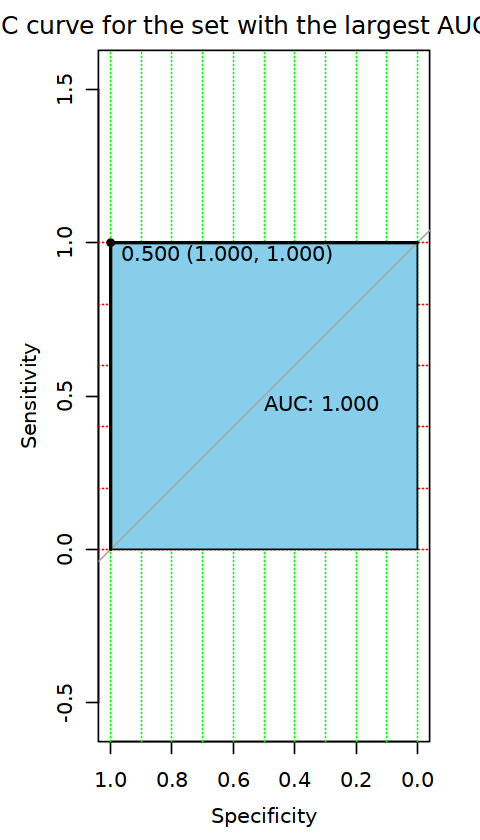

In [97]:
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="ROC curve for the set with the largest AUC value")

In [98]:
library("autoReg")
overall.log =  glm(Group~.,data=data,family=binomial())
model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)
model3


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


name     desc             1 (N=59)            0 (N=60)            id      
1  CDC42EP3 Mean <U+00B1> SD 23.8 <U+00B1> 4.8   19.5 <U+00B1> 4.4   CDC42EP3
2  EIF1AD   Mean <U+00B1> SD 9.8 <U+00B1> 1.8    9.0 <U+00B1> 1.3    EIF1AD  
3  FYB1     Mean <U+00B1> SD 170.5 <U+00B1> 32.1 139.1 <U+00B1> 22.0 FYB1    
4  GOLGA5   Mean <U+00B1> SD 14.0 <U+00B1> 2.8   11.9 <U+00B1> 1.8   GOLGA5  
5  JHY      Mean <U+00B1> SD 1.5 <U+00B1> 0.7    1.2 <U+00B1> 0.3    JHY     
6  LY96     Mean <U+00B1> SD 40.6 <U+00B1> 14.7  30.3 <U+00B1> 8.5   LY96    
7  PATL1    Mean <U+00B1> SD 30.6 <U+00B1> 5.0   25.8 <U+00B1> 3.9   PATL1   
8  PNRC1    Mean <U+00B1> SD 132.6 <U+00B1> 29.8 118.0 <U+00B1> 17.8 PNRC1   
9  PPP1R11  Mean <U+00B1> SD 48.2 <U+00B1> 8.0   41.4 <U+00B1> 5.6   PPP1R11 
10 PRR3     Mean <U+00B1> SD 4.5 <U+00B1> 1.0    3.7 <U+00B1> 0.8    PRR3    
11 RAB7A    Mean <U+00B1> SD 97.1 <U+00B1> 23.0  78.2 <U+00B1> 12.1  RAB7A   
12 RBM33    Mean <U+00B1> SD 27.8 <U+00B1> 2.9   25.6 <U+00B1> 1.8   RBM33   
13 RPL28    Mean <U+00B1> SD 112.3 <U+00B1> 43.1 89.1 <U+00B1> 26.7  RPL28   
14 RPS11    Mean <U+00B1> SD 278.9 <U+00B1> 79.4 208.0 <U+00B1> 64.3 RPS11   
15 SAP130   Mean <U+00B1> SD 14.5 <U+00B1> 2.8   12.0 <U+00B1> 1.7   SAP130  
16 SDHAF3   Mean <U+00B1> SD 1.8 <U+00B1> 0.6    1.5 <U+00B1> 0.5    SDHAF3  
17 SSU72    Mean <U+00B1> SD 9.8 <U+00B1> 1.4    8.7 <U+00B1> 0.8    SSU72   
18 ZKSCAN7  Mean <U+00B1> SD 1.8 <U+00B1> 0.4    1.6 <U+00B1> 0.3    ZKSCAN7 
19 ZNF608   Mean <U+00B1> SD 1.0 <U+00B1> 0.6    0.7 <U+00B1> 0.2    ZNF608  
   OR (univariable)        
1  0.77 (0.69-0.87, p<.001)
2  0.71 (0.55-0.91, p=.006)
3  0.96 (0.94-0.97, p<.001)
4  0.65 (0.53-0.80, p<.001)
5  0.27 (0.11-0.63, p=.003)
6  0.92 (0.88-0.96, p<.001)
7  0.77 (0.69-0.86, p<.001)
8  0.97 (0.96-0.99, p=.003)
9  0.86 (0.80-0.92, p<.001)
10 0.41 (0.26-0.64, p<.001)
11 0.93 (0.90-0.96, p<.001)
12 0.66 (0.55-0.80, p<.001)
13 0.98 (0.97-0.99, p=.001)
14 0.99 (0.98-0.99, p<.001)
15 0.56 (0.44-0.71, p<.001)
16 0.42 (0.21-0.85, p=.016)
17 0.38 (0.25-0.59, p<.001)
18 0.37 (0.14-0.96, p=.040)
19 0.08 (0.02-0.32, p<.001)
   OR (multivariable)                                                                                                                                                                                                                                                                  
1  0.00 (0.00-Inf, p=.986)                                                                                                                                                                                                                                                             
2  Inf (0.00-Inf, p=.982)                                                                                                                                                                                                                                                              
3  16029.88 (0.00-Inf, p=.984)                                                                                                                                                                                                                                                         
4  2677119556726124789539000950287071008523512485708917192454947199679421727074322007774901192124664655391347206782976.00 (0.00-Inf, p=.982)                                                                                                                                           
5  0.00 (0.00-Inf, p=.982)                                                                                                                                                                                                                                                             
6  0.00 (0.00-Inf, p=.981)                                                                                                                                                                                 

In [99]:
b

[1] "CDC42EP3" "EIF1AD"   "FYB1"     "GOLGA5"   "JHY"      "LY96"    
 [7] "PATL1"    "PNRC1"    "PPP1R11"  "PRR3"     "RAB7A"    "RBM33"   
[13] "RPL28"    "RPS11"    "SAP130"   "SDHAF3"   "SSU72"    "ZKSCAN7" 
[19] "ZNF608"

In [247]:
library(ROCR)

dd<-datadist(data)  #开始打包数据
options(datadist="dd")

data$Group = as.factor(data$Group)

fit1 <- lrm(Group~AC132872.2+NEK2+CCNA2+SAP130 , data=data,x=T,y=T)


fit1

#  https://blog.csdn.net/Ayue0616/article/details/126601832

# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

# https://blog.csdn.net/Dr_long1996/article/details/135446784

save(fit1,data,file = 'train.fit1.rda')

#列线图代码只能在Rstudio话

# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

Logistic Regression Model

lrm(formula = Group ~ AC132872.2 + NEK2 + CCNA2 + SAP130, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            85    LR chi2      59.37     R2       0.670    C       0.927    
 1             43    d.f.             4     R2(4,85) 0.479    Dxy     0.854    
 0             42    Pr(> chi2) <0.0001    R2(4,63.7)0.581    gamma   0.855    
max |deriv| 7e-08                           Brier    0.115    tau-a   0.432    

           Coef     S.E.   Wald Z Pr(>|Z|)
Intercept   15.0083 3.4430  4.36  <0.0001 
AC132872.2  -4.0132 1.4002 -2.87  0.0042  
NEK2       -13.5900 6.0391 -2.25  0.0244  
CCNA2       -2.6275 0.9592 -2.74  0.0062  
SAP130      -0.5966 0.1819 -3.28  0.0010  


In [253]:
fit.reduce <- glm(Group~AC132872.2+NEK2+CCNA2+SAP130,data=data,family=binomial())

In [254]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)


Waiting for profiling to be done...



In [293]:
df5

Var        OR                   Pvalue OR_1        OR_2      
AC132872.2 AC132872.2 -4.01(-7.18~-1.59)   0.004   -7.1788921 -1.5913535
NEK2       NEK2       -13.59(-26.72~-2.64) 0.024  -26.7179089 -2.6406154
CCNA2      CCNA2      -2.63(-4.71~-0.92)   0.006   -4.7092999 -0.9221778
SAP130     SAP130     -0.6(-1~-0.27)       0.001   -0.9963749 -0.2713556
           OR_mean    
AC132872.2  -4.0131795
NEK2       -13.5899731
CCNA2       -2.6275058
SAP130      -0.5965813

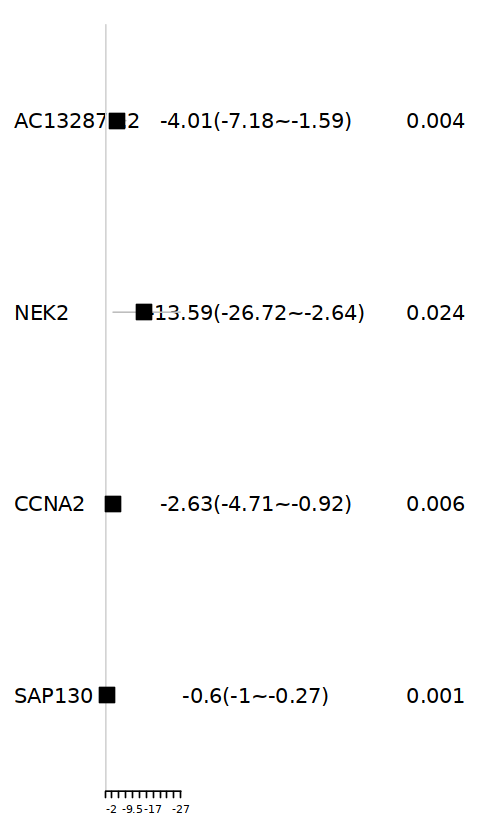

In [255]:

library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           graph.pos=2)

In [ ]:
# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            lineheight = unit(7,'mm'),
#            colgap=unit(2,'mm'),
#            lwd.zero=1.5,
#            lwd.ci=2, 
#            col=fpColors(box='#458B00',
#                         summary='#8B008B',
#                         lines = 'black',
#                         zero = '#7AC5CD'),
#            xlab="OR",
#            lwd.xaxis =1,
#            txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
#                             xlab  = gpar(cex = 0.8),
#                             cex = 0.9),
#            lty.ci = "solid",
#            title = "Forestplot", 
#            line.margin = 0.08,
#            graph.pos=2)


In [ ]:
#nmfinput= data[MDD,c('MYRF','IGHJ3P','RBMS1P1','CTD.2114J12.1')] %>%  t() %>%  as.data.frame()

In [ ]:
library(NMF)

In [ ]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

In [ ]:
plot(estim.coad)

In [ ]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

In [ ]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [ ]:
library(tinyarray)

In [ ]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [ ]:
a = data1[,colnames(nmfinput)]

In [ ]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

In [ ]:
draw_pca(n,group)

In [ ]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

In [ ]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [ ]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [ ]:
dim(bulk2.group)

In [ ]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")

In [101]:
expr3$Group = ifelse(expr3$Group == 'CI',1,0)

In [119]:
data = expr3

In [ ]:
gene = RNF208   PLXNB3  ITGA2B

In [140]:
set.seed(21)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=10,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:5){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~RNF208,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.8248207

In [142]:
auc_value

[1] 0.8261773 0.8040166 0.8331025 0.8367072 0.8240997

In [143]:
num <- which.max(auc_value)
print(num)

[1] 4


In [146]:
fold_train <- data[folds[[num]],]   
fold_test <- data[-folds[[num]],]

fold_pre <- glm(Group~RNF208,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



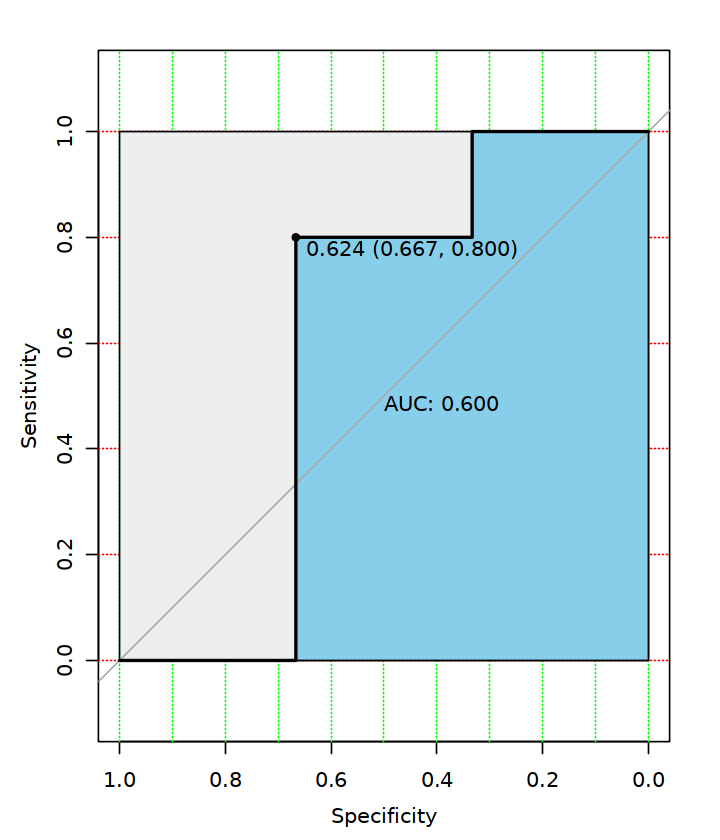

In [147]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [150]:
fold_pre <- glm(Group~PLXNB3,data=data,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



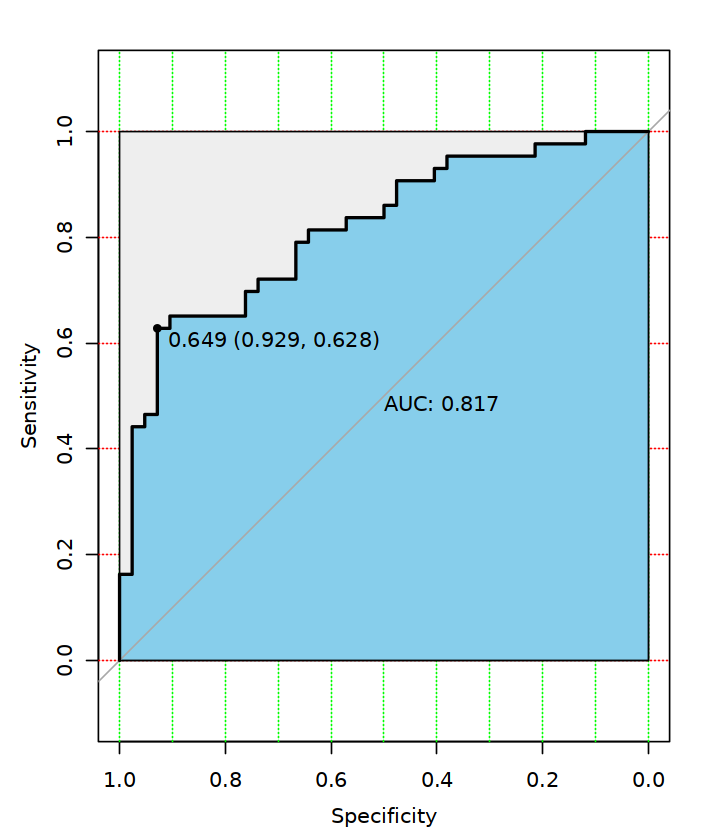

In [151]:
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")